In [31]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [35]:
%config completer.use_jedi = False

In [7]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


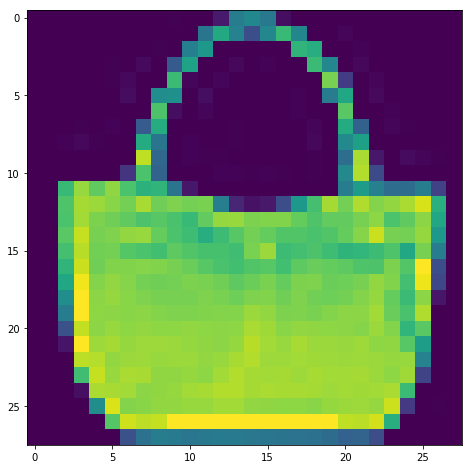

In [37]:
plt.figure(figsize=(10,8))
plt.imshow(x_train[100])


In [39]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
def build_model(hp):
    model = 

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *

# create dummy data
X = np.random.uniform(0,1, (32,5,3)).astype(np.float32)

pool1 = MaxPool1D()(X)
pool2 = MaxPooling1D()(X)

tf.reduce_all(pool1 == pool2) # True

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [78]:
x=np.random.uniform(0,1, (32,5,3)).astype(np.float32)

In [85]:
pool1 = MaxPool1D()(X)
pool2 = MaxPooling1D()(X)

In [86]:
pool1.shape, x.shape,pool2.shape

(TensorShape([32, 2, 3]), (32, 5, 3), TensorShape([32, 2, 3]))

In [87]:
pool1[1]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.5363526 , 0.5194242 , 0.16029988],
       [0.32999572, 0.60985   , 0.95362836]], dtype=float32)>

In [88]:
x[1]

array([[0.96599567, 0.18067425, 0.49423033],
       [0.21124789, 0.0639455 , 0.19029857],
       [0.8764762 , 0.00179906, 0.84012496],
       [0.3138498 , 0.2459052 , 0.8592666 ],
       [0.9626025 , 0.3358149 , 0.8462939 ]], dtype=float32)

In [89]:
pool2[1]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.5363526 , 0.5194242 , 0.16029988],
       [0.32999572, 0.60985   , 0.95362836]], dtype=float32)>

In [90]:
input_shape = (4, 10, 128)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv1D(32, 3, activation='relu',input_shape=input_shape[1:])(x)
print(y.shape)


(4, 8, 32)


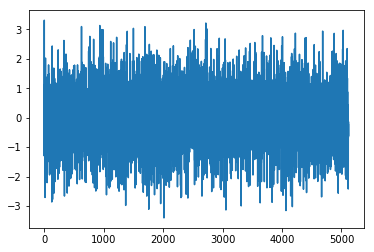

In [103]:
plt.plot(x.numpy().ravel())

In [105]:

x.numpy().ravel().shape

(5120,)

In [106]:
input_shape[1:]

(10, 128)